In [1]:
import os
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from yellowbrick.model_selection import RFECV as yrfe
from sklearn.feature_selection import RFECV as srfe
# from yellowbrick.model_selection import RFECV, rfecv
# from sklearn.feature_selection import RFECV
from scipy.stats import pearsonr


In [3]:
def save_as_pickle(f, fn):
    pth = os.path.join(os.getcwd(), 'Dataset', fn+'.pk')
    with open(pth, 'wb') as p:
        pickle.dump(f, p)

def load_from_pickle(fn):
    pth = os.path.join(os.getcwd(),  'Dataset', fn + '.pk')
    with open(pth, 'rb') as p:
        return pickle.load(p)

def load_pd_pickle(fn):
    pth = os.path.join(os.getcwd(), 'Dataset', fn + '.pk')
    return pd.read_pickle(pth)

In [4]:
X = load_pd_pickle('X')
y_classification = load_from_pickle('y_classification')
y_regression = load_from_pickle('y_regression')
data = load_pd_pickle('result_all')
data = data.drop(['target'], axis=1)

correlated_features = set()
correlation_matrix = X.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            correlated_features.add(correlation_matrix.columns[i])
print(f'The length of correlated features is {len(correlated_features)}')
X.drop(columns=list(correlated_features), inplace=True)

cv = StratifiedKFold(5)
cols = X.columns.to_list()

The length of correlated features is 165


In [5]:
def yrfe_classification(X, y, step, s):

    rfecv = yrfe(estimator=RandomForestClassifier(class_weight="balanced"), step=step, cv=StratifiedKFold(5),
                scoring='f1_weighted')
    rfecv.fit(X, y)
    rfecv.show()
    cols_classification = [x for i, x in enumerate(cols) if np.array(rfecv.support_)[i]]
    print(len(cols_classification))
    save_as_pickle(cols_classification, 'y_cols_classification'+s)

def srfe_classification(X, y, step, s):

    min_features_to_select = 1  # Minimum number of features to consider
    rfecv = srfe(estimator=RandomForestClassifier(class_weight="balanced"), step=step, cv=StratifiedKFold(5),
                scoring='f1_weighted',
                min_features_to_select=min_features_to_select,
                n_jobs=-1)
    rfecv.fit(X, y)
    cols_classification = [x for i, x in enumerate(cols) if np.array(rfecv.support_)[i]]
    print(len(cols_classification))
    save_as_pickle(cols_classification, 's_cols_classification'+s)


def rfe_regression(X, y, step, s):
    visualizer = srfe(RandomForestRegressor(), cv=cv, step=step, scoring='r2')

    visualizer.fit(X, y)  # Fit the data to the visualizer
    visualizer.show()  # Finalize and render the figure
    cols_regression = [x for i, x in enumerate(cols) if np.array(visualizer.support_)[i]]
    print(len(cols_regression))
    save_as_pickle(cols_regression, 'cols_regression'+s)


dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start']) 


dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start']) 


dict_keys(['ax', 'cv', 'estimator', 'groups', 'scoring', 'step', 'bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_sa

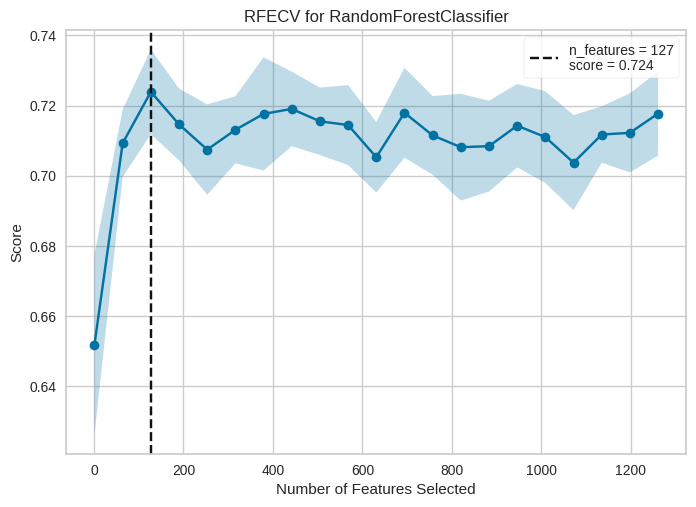

127


In [6]:
yrfe_classification(X, y_classification, 0.05, '_005')

In [7]:
srfe_classification(X, y_classification, 0.05, '_005')

1260


In [ ]:
# rfe_regression(X, y_classification, 0.05, '_005')
# rfe_classification(X, y_classification, 0.1, '_01')
# rfe_regression(X, y_classification, 0.05, '_005')